In [1]:
import sys
sys.path.append('/Users/wuboyu/Desktop/auto_strategy')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from core.auto_strategy import GreedyStrategy
import geatpy as ea
from collections import OrderedDict

# 1.数据准备

In [2]:
# 数据集
df = pd.read_csv('../data/data.csv')

# 目标变量
target = 'Creditability'

# 切分train和test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=2020, stratify=df[target])

var_dict = {'AccountBalance': 1,
            'CreditAmount': 0,
            'Duration': 0,
            'PaymentStatusofPreviousCredit': 1,
            'ValueSavings': 1,
            'Purpose': 0,
            'Lengthofcurrentemployment': 1,
            'Age': 1,
            'Mostvaluableavailableasset': 0,
            'Typeofapartment': 1,
            'ConcurrentCredits': 1,
            'SexMaritalStatus': 1}
# 目标通过率
expected_pass_rate = 0.5

# 2.根据目标通过率确定单变量的阈值范围

In [3]:
gs = GreedyStrategy(df_train, target, var_dict, expected_pass_rate, show=False)
ordered_var = gs.get_ordered_var_by_pass_rate(current_pass_rate=expected_pass_rate, used_var_dict=None,
                                              cached_y_pred=None)

lb = []
ub = []
for var, [search_domain, recall] in ordered_var:
    lb.append(min(search_domain))
    ub.append(max(search_domain))
    print(var, recall)

CreditAmount 0.5
Age 0.4857142857142857
AccountBalance 0.4714285714285714
Duration 0.4714285714285714
ValueSavings 0.336734693877551
PaymentStatusofPreviousCredit 0.3346938775510204
Lengthofcurrentemployment 0.2714285714285714
Purpose 0.20204081632653062


# 3.遗传算法确定最优阈值

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 7 |  800   | 4.61224E-01 | 4.61224E-01 | 4.61224E-01 | 4.61224E-01 | 0.00000E+00 
 8 |  900   | 4.95918E-01 | 4.95918E-01 | 4.58017E-01 | 3.85714E-01 | 3.17450E-02 
 9 |  1000  | 5.69388E-01 | 5.69388E-01 | 4.58791E-01 | 3.55102E-01 | 5.10456E-02 
 10|  1100  | 5.75510E-01 | 5.75510E-01 | 4.46269E-01 | 2.20408E-01 | 6.23367E-02 
 11|  1200  | 5.75510E-01 | 5.75510E-01 | 4.71551E-01 | 3.97959E-01 | 3.84669E-02 
 12|  1300  | 5.75510E-01 | 5.75510E-01 | 4.94796E-01 | 4.61224E-01 | 3.62661E-02 
 13|  1400  | 5.79592E-01 | 5.79592E-01 | 5.16857E-01 | 4.75510E-01 | 3.68836E-02 
 14|  1500  | 5.81633E-01 | 5.81633E-01 | 5.42673E-01 | 4.95918E-01 | 3.28376E-02 
 15|  1600  | 5.81633E-01 | 5.81633E-01 | 5.69653E-01 | 5.63265E-01 | 4.52357E-03 
 16|  1700  | 5.81633E-01 | 5.81633E-01 | 5.73347E-01 | 5.69388E-01 | 2.95489E-03 
 17|

103| 10400  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
104| 10500  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
105| 10600  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
106| 10700  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
107| 10800  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
108| 10900  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
109| 11000  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
110| 11100  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
111| 11200  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
112| 11300  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
113| 11400  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
114| 11500  | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 6.06122E-01 | 0.00000E+00 
115|

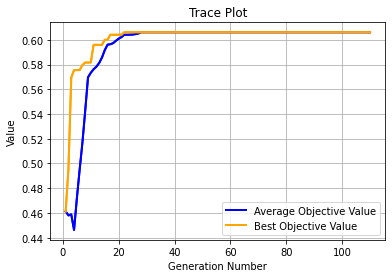

Execution time: 146.97215390205383 s
Evaluation number: 11700
The best objective value is: 0.6061224489795919
The best variables are: 
671.5663682417944	65.31311701703817	3.58840006031096	5.531444502994418	4.388261616230011	4.0	5.0	0.0	


In [4]:
# 定义目标函数（适应度函数）
@ea.Problem.single
def objective_func(cut_off_list):
    cut_off_dict = OrderedDict()
    for var, cut_off in zip(gs.var_dict, cut_off_list):
        cut_off_dict[var] = cut_off
    # 通过率和召回率
    pass_rate, recall = gs.get_all_rule_pass_rate_and_recall(cut_off_dict)
    CV = np.array([expected_pass_rate-pass_rate])
    return recall, CV

# 构建问题
problem = ea.Problem(name='遗传算法寻找最优阈值',
                     M=1,  # 目标维数
                     maxormins=[-1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                     Dim=len(gs.var_dict),  # 决策变量维数
                     varTypes=[0] * len(gs.var_dict),  # 决策变量的类型列表，0：实数；1：整数
                     lb=lb,  # 决策变量下界
                     ub=ub,  # 决策变量上界
                     evalVars=objective_func)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem=problem,
                                 population=ea.Population(Encoding='RI', NIND=100),
                                 MAXGEN=1000,  # 最大进化代数。
                                 logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                 trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                 maxTrappedCount=100)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=True,
                  dirName='result')

In [5]:
# 得到最优阈值
ga_cut_off_list = res['Vars'][0]
ga_cut_off_dict = OrderedDict()

for var, cut_off in zip(gs.var_dict, ga_cut_off_list):
    ga_cut_off_dict[var] = cut_off
print(ga_cut_off_dict)

OrderedDict([('CreditAmount', 671.5663682417944), ('Age', 65.31311701703817), ('AccountBalance', 3.58840006031096), ('Duration', 5.531444502994418), ('ValueSavings', 4.388261616230011), ('PaymentStatusofPreviousCredit', 4.0), ('Lengthofcurrentemployment', 5.0), ('Purpose', 0.0)])


# 4.规则效果评估

In [6]:
train_all_rule_pass_rate_and_recall, train_rule_detail = gs.predict(df_train, ga_cut_off_dict)
test_all_rule_pass_rate_and_recall, test_rule_detail = gs.predict(df_test, ga_cut_off_dict)

In [7]:
print('训练集整体通过率: {}和召回率: {}'.format(*train_all_rule_pass_rate_and_recall))

训练集整体通过率: 0.5和召回率: 0.6061224489795919


In [8]:
train_rule_detail

,变量名称,规则名称,单条规则通过率,单条规则召回率,累计通过率,累计召回率
0,CreditAmount,CreditAmount < 671.5663682417944,0.961429,0.042857,0.961429,0.042857
1,Age,Age > 65.31311701703817,0.981429,0.018367,0.942857,0.061224
2,AccountBalance,AccountBalance > 3.58840006031096,0.631429,0.471429,0.585714,0.520408
3,Duration,Duration < 5.531444502994418,0.992857,0.010204,0.584286,0.522449
4,ValueSavings,ValueSavings > 4.388261616230011,0.820000,0.206122,0.500000,0.606122
5,PaymentStatusofPreviousCredit,PaymentStatusofPreviousCredit > 4.0,1.000000,0.000000,0.500000,0.606122
6,Lengthofcurrentemployment,Lengthofcurrentemployment > 5.0,1.000000,0.000000,0.500000,0.606122
7,Purpose,Purpose < 0.0,1.000000,0.000000,0.500000,0.606122


In [9]:
print('测试集整体通过率: {}和召回率: {}'.format(*test_all_rule_pass_rate_and_recall))

测试集整体通过率: 0.44666666666666666和召回率: 0.6666666666666666


In [10]:
test_rule_detail

,变量名称,规则名称,单条规则通过率,单条规则召回率,累计通过率,累计召回率
0,CreditAmount,CreditAmount < 671.5663682417944,0.966667,0.042857,0.966667,0.042857
1,Age,Age > 65.31311701703817,0.983333,0.019048,0.950000,0.061905
2,AccountBalance,AccountBalance > 3.58840006031096,0.546667,0.557143,0.516667,0.590476
3,Duration,Duration < 5.531444502994418,0.993333,0.009524,0.516667,0.590476
4,ValueSavings,ValueSavings > 4.388261616230011,0.810000,0.238095,0.446667,0.666667
5,PaymentStatusofPreviousCredit,PaymentStatusofPreviousCredit > 4.0,1.000000,0.000000,0.446667,0.666667
6,Lengthofcurrentemployment,Lengthofcurrentemployment > 5.0,1.000000,0.000000,0.446667,0.666667
7,Purpose,Purpose < 0.0,1.000000,0.000000,0.446667,0.666667
